# CMIP6 multimodel mean process

In [7]:
ls ../../src/DATA/cmip6-mmm

clt-CMIP6-clim60.nc  ps-CMIP6-clim60.nc   ts-CMIP6-clim60.nc
pr-CMIP6-clim60.nc   rh-CMIP6-clim60.nc


In [8]:
import xarray as xr

In [9]:
ts = xr.open_dataarray("../../src/DATA/cmip6-mmm/ts-CMIP6-clim60.nc")

In [30]:
pr = xr.open_dataarray("../../src/DATA/cmip6-mmm/pr-CMIP6-clim60.nc")

In [46]:
from src.xr_utils import get_trend, can_coords, clip
from src.plot_utils import cmap, get_dim, ps_defaults, label_subplots, axis_formatter
ps_defaults(dpi=200, use_tex=False)

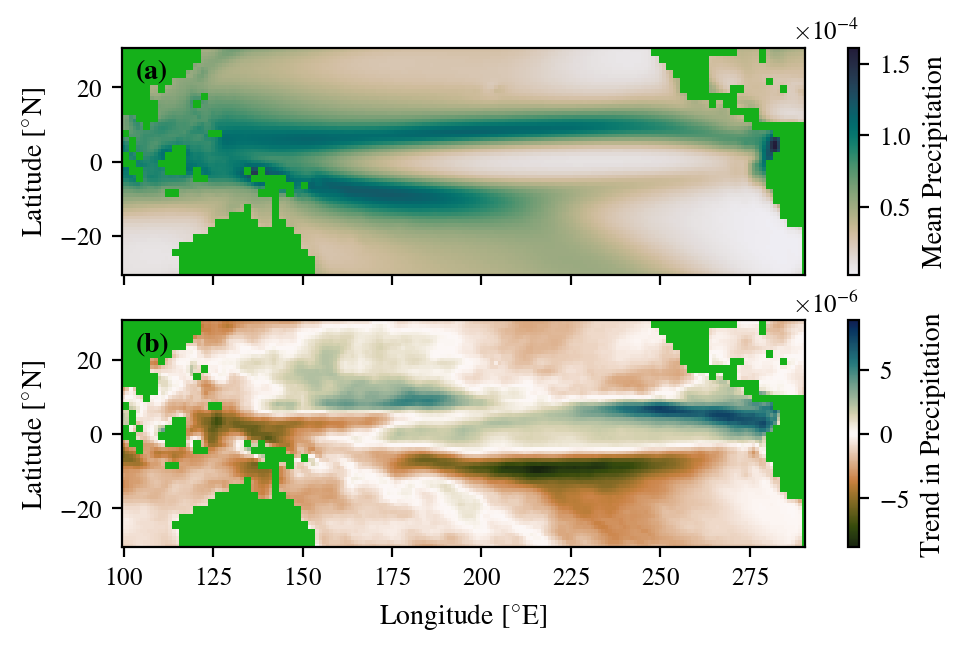

In [47]:
import matplotlib.pyplot as plt

pr = xr.open_dataarray("../../src/DATA/cmip6-mmm/pr-CMIP6-clim60.nc")
fig, axs = plt.subplots(2, figsize=get_dim(ratio=2 * 0.3), sharex=True)
pr_mean = can_coords(pr).mean("T")
clip(pr_mean).plot(
    ax=axs[0],
    cmap=cmap("rain"),
    cbar_kwargs={
        "label": "Mean Precipitation",
        "format": axis_formatter(),
    },
)  # , vmin=-1.5, vmax=1.5)
axs[0].set_xlabel("")
pr_trend = get_trend(can_coords(pr))
clip(pr_trend).plot(
    ax=axs[1], cmap=cmap("ranom"), cbar_kwargs={"label": "Trend in Precipitation"}
)  # , vmin=-1.5, vmax=1.5)
label_subplots(axs)

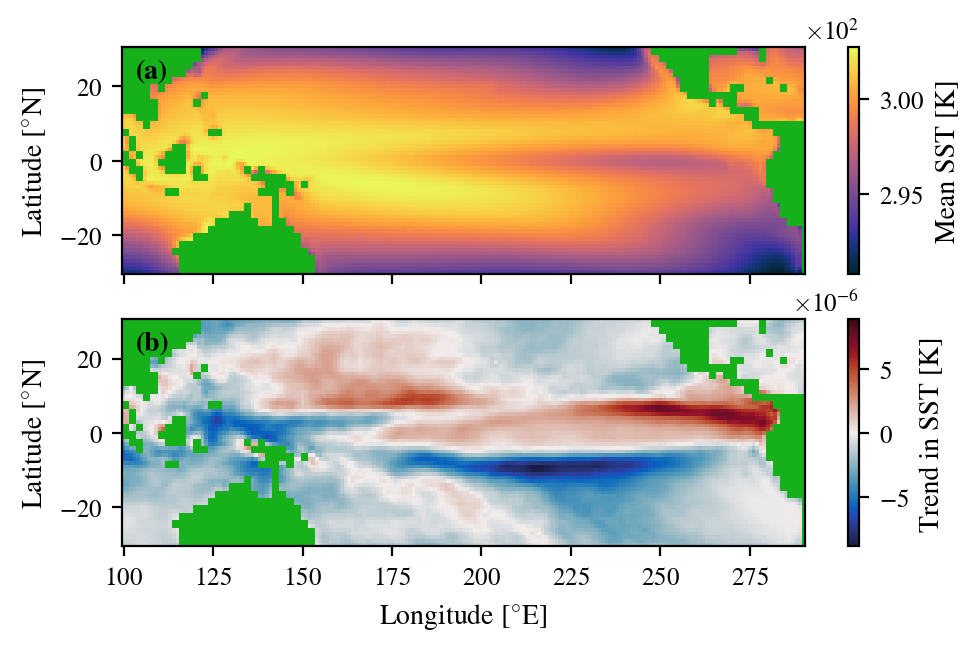

In [48]:
import matplotlib.pyplot as plt

ts = xr.open_dataarray("../../src/DATA/cmip6-mmm/ts-CMIP6-clim60.nc")
fig, axs = plt.subplots(2, figsize=get_dim(ratio=2 * 0.3), sharex=True)
ts_mean = can_coords(ts).mean("T")
clip(ts_mean).plot(
    ax=axs[0],
    cmap=cmap("sst"),
    cbar_kwargs={
        "label": "Mean SST [K]",
        "format": axis_formatter(),
    },
)  # , vmin=-1.5, vmax=1.5)
axs[0].set_xlabel("")
pr_trend = get_trend(can_coords(pr))
clip(pr_trend).plot(
    ax=axs[1], cmap=cmap("delta"), cbar_kwargs={"label": "Trend in SST [K]"}
)  # , vmin=-1.5, vmax=1.5)
label_subplots(axs)

In [ ]:
ts.mean("time").plot()